# Helper Notebook 

This notebook is presented to understand helper functions and utility classes for the task of **Face Swapping**

_Note: This notebook requires a GPU_

In [ ]:
!pip install face_recognition

## Import Required Libraries and Utilities

In [3]:
import cv2
import dlib
import glob
import face_recognition
import face_recognition_models
from face_utils import Extract 
from face_utils import FaceFilter 
from face_utils import DetectedFace
from matplotlib import pyplot as plt

## Set Predictor Model using DLIB

In [10]:
predictor_68_point_model = face_recognition_models.pose_predictor_model_location()
pose_predictor = dlib.shape_predictor(predictor_68_point_model)

In [6]:
def _css_to_rect(css):
    return dlib.rectangle(css[3], css[0], css[1], css[2])
    
def _raw_face_landmarks(face_image, face_locations):
    face_locations = [_css_to_rect(face_location) for face_location in face_locations]
    return [pose_predictor(face_image, face_location) for face_location in face_locations]

def detect_faces(frame):
    face_locations = face_recognition.face_locations(frame)
    landmarks = _raw_face_landmarks(frame, face_locations)

    for ((y, right, bottom, x), landmarks) in zip(face_locations, landmarks):
        yield DetectedFace(frame[y: bottom, x: right], 
                           x, right - x, y, bottom - y, landmarks)

## Load a Sample Image to Analyze

This sample image has two public figures, Donald Trump and Narendra Modi. We will work through the following tasks:
- Identify faces in this image
- Perform face recognition, identify which face belongs to Donald Trump
- Extract required face and perform alignment

### Task 1 : Detect Faces

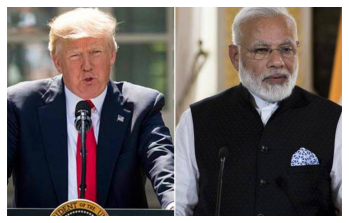

In [20]:
# Load Sample Image
image = cv2.imread('sample_image.jpg')
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
plt.axis('off');

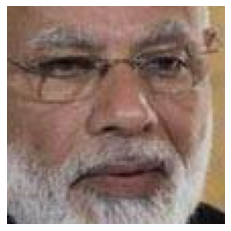

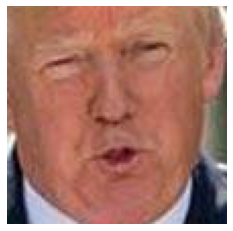

In [22]:
# Detect faces and visualize them all
detected_faces = [face for face in detect_faces(image)]
for face in detected_faces:
  plt.imshow(cv2.cvtColor(face.image , cv2.COLOR_BGR2RGB))
  plt.axis('off');
  plt.show()

### Task 2: Perform Face Recognition
- Use a __reference image__ of Donald Trump to compare against
- Iterate through all the faces identified in the original sample and check which face matches the reference image.

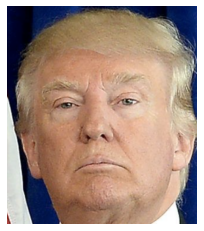

In [27]:
# Reference Image
ref_image = cv2.imread('trump_ref.png')
plt.imshow(cv2.cvtColor(ref_image , cv2.COLOR_BGR2RGB))
plt.axis('off');

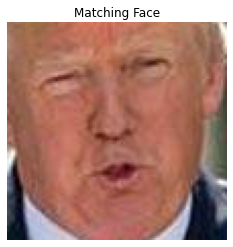

In [28]:
face_filter = FaceFilter('trump_ref.png')

for face in detected_faces:
  if face_filter.check(face):
    plt.title("Matching Face")
    plt.imshow(cv2.cvtColor(face.image , cv2.COLOR_BGR2RGB))
    plt.axis('off');
    plt.show()

### Task 3: Extract and Align
- Given the sample image and the reference image, extract the matching face
- Perform head alignment for the extracted face

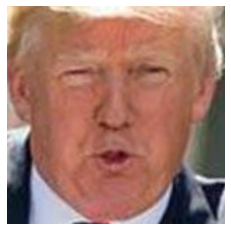

In [30]:
# Extract and Align Face
extractor = Extract()
resized_image = extractor.extract(image, detected_faces[1], 256)
plt.imshow(cv2.cvtColor(resized_image , cv2.COLOR_BGR2RGB))
plt.axis('off');
plt.show()